# Tests for transient CSEM calculation with emg3d

In [5]:
import emg3d
import empymod
import discretize
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate as si
from scipy.interpolate import InterpolatedUnivariateSpline as iuSpline

In [7]:
# Style adjustments
%matplotlib notebook
plt.style.use('ggplot')
plt.rcParams['savefig.dpi'] = 300

## 1. Laplace and frequency domain response comparison

In [8]:
src = [0, 0, 500]
rec = [1000, 1000, 600]
depth = [0]
res = [2e24, 1]
solution = 'dhs'

# Frequencies
freqs = np.logspace(-4.5, 3, 301)

In [9]:
# Frequency domain s = 2j*pi*freq
out_fn = empymod.dipole(src=src, rec=rec, depth=depth, res=res, freqtime=freqs)
out_fa = empymod.analytical(src=src, rec=rec, res=res[1], freqtime=freqs, solution=solution)


:: empymod END; runtime = 0:00:00.118145 :: 1 kernel call(s)


:: empymod END; runtime = 0:00:00.002595 :: 



In [10]:
# Laplace domain s = freq
out_ln = empymod.dipole(src=src, rec=rec, depth=depth, res=res, freqtime=-freqs)
out_la = empymod.analytical(src=src, rec=rec, res=res[1], freqtime=-freqs, solution=solution)


:: empymod END; runtime = 0:00:00.043211 :: 1 kernel call(s)


:: empymod END; runtime = 0:00:00.003186 :: 



<IPython.core.display.Javascript object>


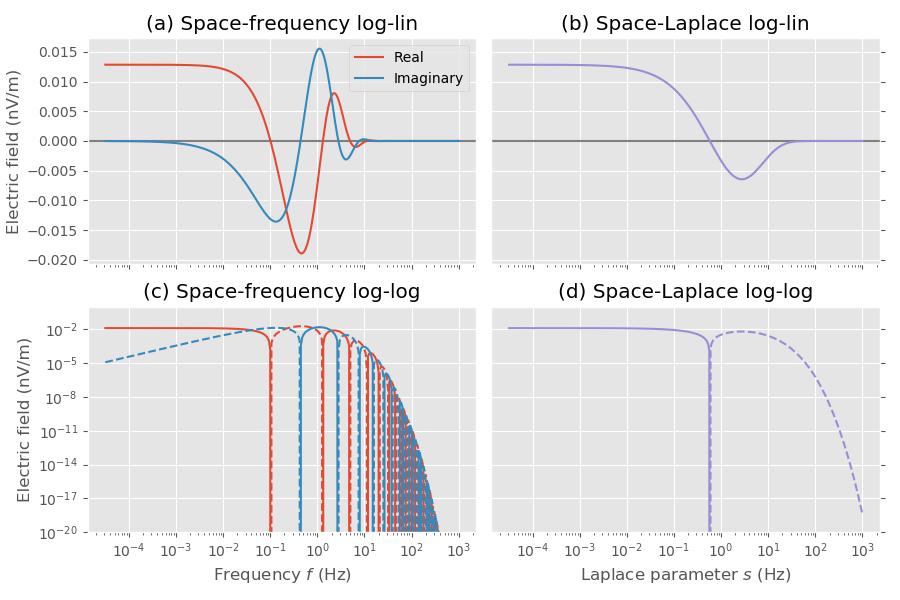

In [16]:
fig, ((ax3, ax4), (ax1, ax2)) = plt.subplots(2, 2, sharex=True, sharey='row', figsize=(9, 6))

# Frequency domain
ax1.set_title('(c) Space-frequency log-log')
ax1.set_xlabel('Frequency $f$ (Hz)')
ax1.set_ylabel('Electric field (nV/m)')

ax1.plot(freqs, out_fa.real*1e9, 'C0-', label='Real')
ax1.plot(freqs, -out_fa.real*1e9, 'C0--')
ax1.plot(freqs, out_fa.imag*1e9, 'C1-', label='Imaginary')
ax1.plot(freqs, -out_fa.imag*1e9, 'C1--')

ax1.set_xscale('log')
ax1.set_yscale('log')

# Laplace domain
ax2.set_title('(d) Space-Laplace log-log')
ax2.set_xlabel('Laplace parameter $s$ (Hz)')

ax2.plot(freqs, out_la*1e9, 'C2-', label='s-domain')
ax2.plot(freqs, -out_la*1e9, 'C2--', label='s-domain')

ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim([1e-20, 1e0])

# Frequency domain
ax3.set_title('(a) Space-frequency log-lin')
ax3.set_ylabel('Electric field (nV/m)')

ax3.axhline(0, color='.5')
ax3.plot(freqs, out_fa.real*1e9, 'C0-', label='Real')
ax3.plot(freqs, out_fa.imag*1e9, 'C1-', label='Imaginary')
#ax3.plot(freqs, out_fn.real*1e9, 'k:', label='numerical')
#ax3.plot(freqs, out_fn.imag*1e9, 'k:')
ax3.legend()

ax3.set_xscale('log')

# Laplace domain
ax4.set_title('(b) Space-Laplace log-lin')

ax4.axhline(0, color='.5')
ax4.plot(freqs, out_la*1e9, 'C2-', label='analytical')
#ax4.plot(freqs, out_ln*1e9, 'k:', label='numerical')
#ax4.legend()

ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")
ax4.set_xscale('log')

plt.tight_layout()
plt.savefig('../figures/motivationcomparison.pdf', bbox_inches='tight')
plt.show()

In [7]:
emg3d.Report([empymod, discretize])

--------------------------------------------------------------------------------
  Date: Thu Sep 05 14:33:02 2019 CEST

             Linux : OS
                 4 : CPU(s)
            x86_64 : Machine
             64bit : Architecture
           15.5 GB : RAM
           Jupyter : Environment

  Python 3.7.3 (default, Mar 27 2019, 22:11:17)  [GCC 7.3.0]

         1.8.4dev0 : empymod
            0.4.10 : discretize
            1.16.4 : numpy
             1.3.0 : scipy
            0.45.0 : numba
         0.7.2dev0 : emg3d
             7.6.0 : IPython
             3.1.0 : matplotlib

  Intel(R) Math Kernel Library Version 2019.0.4 Product Build 20190411 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------